# IMPORTACIÓN DE LIBRERÍAS

El primer paso es importar las librerías que se van a utilizar para entrenar el modelo.

Las librerías que usaremos aquí son:


*   **numpy** --> Manejo de arreglos y operaciones numéricas.
*   **matplotlib** --> Creación de gráficos y visualizaciones.
*   **sklearn (scikit-learn)** --> Herramientas de machine learning.



In [3]:
# Importamos las librerías
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC, OneClassSVM

# DATOS DE TRABAJO

En el caso de uso real del modelo, se inyecta un dataset con los datos reales, pero para expolicar el funcionamiento del modelo se van a utilizar datos aleatorios para visualizar un modelo más entrenado.

En este caso no dividiremos los datasets en training/test, solo trabajaremos con dataset de training, lo que se quiere es visualizar el funcionamiento matemático del modelo.

In [4]:
# Generación de datos de prueba
np.random.seed(42)

# Dos clases bien definidas
X_class0 = np.random.randn(50, 2) - [2, 2]
X_class1 = np.random.randn(50, 2) + [2, 2]
X = np.r_[X_class0, X_class1]
y = [0] * 50 + [1] * 50

# Puntos fuera del rango normal ("desconocidos")
X_outliers = np.random.uniform(low=-8, high=8, size=(20, 2))

# CONFIGURACIONES

Vamos a comparar 3 modelos:



*   Modelo de Soporte de Clasificación Vectorial (SVC) lineal
*   Modelo de Soporte de Clasificación Vectorial (SVC) con kernel gaussiano RBF
*   Modelo de Soporte de Clasificación Vectorial (SVC) "One-Class"



In [5]:
# Configuraciones para comparar
configs = [
    ("SVC Lineal (C=1)", SVC(kernel="linear", C=1)),
    ("SVC RBF (C=1)", SVC(kernel="rbf", C=1, gamma=0.5)),
    ("One-Class SVM (solo clase 1)", OneClassSVM(kernel="rbf", gamma=0.5, nu=0.05)),
]

# VISUALIZACIÓN DE LOS MODELOS GENERADOS

Este punto se centra de mostrar 3 Gráficos, aplicando cada uno de los modelos definidos con los datos generados, vemos cómo agrupa el modelo las muestras y el margen defefinido anañíticamente por parte de cada uno de los modelos.

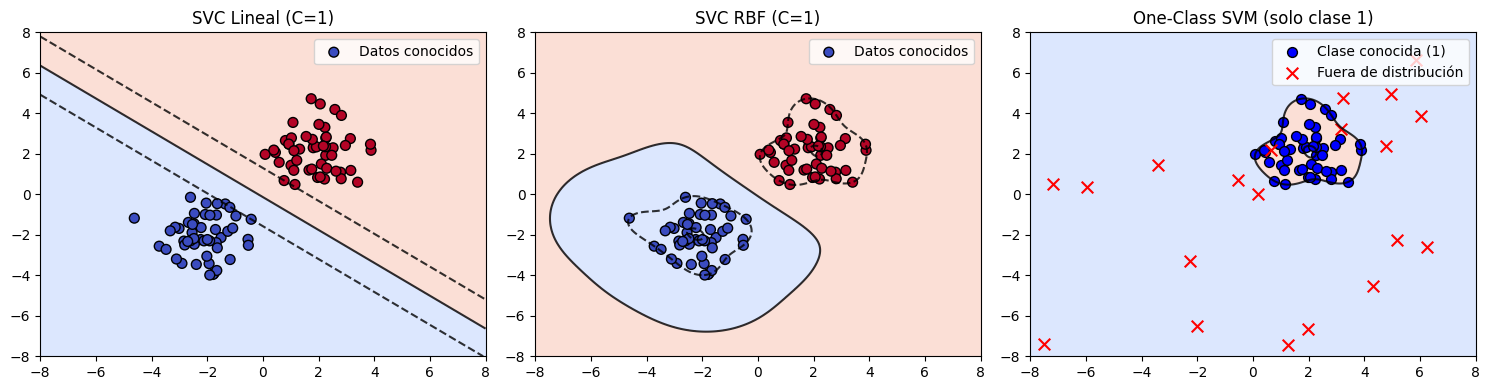

In [6]:
# Entrenamiento y visualización
plt.figure(figsize=(15, 4))

for i, (title, model) in enumerate(configs, 1):
    # Si es One-Class, solo entrenamos con una clase
    if isinstance(model, OneClassSVM):
        X_train = X_class1  # solo una clase
        model.fit(X_train)
        y_pred = model.predict(np.r_[X_class1, X_outliers])
    else:
        model.fit(X, y)
        y_pred = model.predict(X)

    # Malla para graficar
    xx, yy = np.meshgrid(
        np.linspace(-8, 8, 400),
        np.linspace(-8, 8, 400)
    )
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Gráfica
    plt.subplot(1, 3, i)
    plt.contourf(xx, yy, Z > 0, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.contour(xx, yy, Z, colors="k", levels=[-1, 0, 1],
                alpha=0.8, linestyles=["--", "-", "--"])

    # Puntos de entrenamiento
    if isinstance(model, OneClassSVM):
        plt.scatter(X_class1[:, 0], X_class1[:, 1],
                    c="blue", s=50, edgecolors="k", label="Clase conocida (1)")
        plt.scatter(X_outliers[:, 0], X_outliers[:, 1],
                    c="red", marker="x", s=70, label="Fuera de distribución")
    else:
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm,
                    s=50, edgecolors="k", label="Datos conocidos")

    plt.title(title)
    plt.legend(loc="upper right")

plt.tight_layout()
plt.show()

# INTERPRETACIÓN DE LOS RESULTADOS

## SVC Lineal

En este caso, la limitación es que la gráfica se divide linealmente en 2 partes geométricas, que delimita las dos clases, con un canal intermedio definido por la línea divisoria más epsilon para los datos muy cercanos a la división de clases (casos de menor fiabilidad).

## SVC RBF

Delimita una zona perteneciente a una clase (con un margen eosion) y asocia el resto del espacio a la otra clase (en nuestro caso práctico, para la clasificación de procesos incorrectos), muy útil porque la zona generada no es geométrica, se adapta mejor a las muestras y el margen ayuda a la clasificación.

## SVC One-Class

Este solo delimita una clase, y va limitado al las muestras, al no definirse el margen epsilon, solo marca como correctas las muestras que se entuentren dentro (exclusivamente dentro) de la zona delimitada por los vectores de soporte, que son los vectores más externos pertenecientes a la clase definida.